# Analítica Avanzada de Datos
---

### Explorar datos con Python - visualizar datos

En este cuaderno, aplicaremos algunas técnicas para analizar datos con estadísticas básicas y visualizarlos mediante gráficos.

### Cargar nuestros datos

Antes de empezar, vamos a cargar los mismos datos sobre horas de estudio que analizamos en el cuaderno anterior. También recalcularemos quién aprobó la clase de la misma forma que la última vez.

In [3]:
import pandas as pd

# Cargar los datos desde el archivo
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remover cualquier columna con valores perdidos
df_students = df_students.dropna(axis=0, how='any')

# Calcular quien paso, asumiendo que la calificación mínima es 60
passes  = pd.Series(df_students['Calificacion'] >= 60)

# Guardar en un dataframe quien pasó
df_students = pd.concat([df_students, passes.rename("Pasa")], axis=1)


# Imprimir los resultados en el cuaderno
df_students 

,Nombre,HorasEstudio,Calificacion,Pasa
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


## Visualización de datos con Matplotlib

Los DataFrames son una excelente forma de explorar y analizar datos tabulares, pero a veces una imagen vale más que mil filas y columnas. La biblioteca **Matplotlib** proporciona la base para trazar visualizaciones de datos que pueden mejorar en gran medida su capacidad para analizar los datos.

Empecemos con un simple gráfico de barras que muestra la calificación de cada alumno.

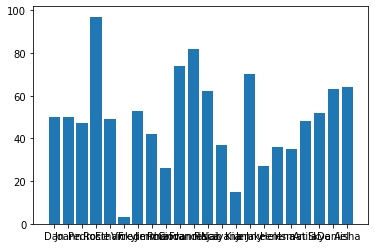

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt

# Crear un gráfico de barras nombre vs calificacion
plt.bar(x=df_students.Nombre, height=df_students.Calificacion)

# Visualizar el gráfico
plt.show()

Bueno, eso funcionó, pero el gráfico podría utilizar algunas mejoras para que sea más claro lo que estamos viendo.

Ten en cuenta que has utilizado la clase **pyplot** de Matplotlib para trazar el gráfico. Esta clase proporciona muchas formas de mejorar los elementos visuales del gráfico. Por ejemplo, el siguiente código:

- Especifica el color del gráfico de barras.
- Añade un título al gráfico (para que sepamos lo que representa).
- Añade etiquetas a los ejes X e Y (para que sepamos qué eje muestra qué datos).
- Añade una cuadrícula (para que sea más fácil determinar los valores de las barras).
- Gira los marcadores X (para que podamos leerlos).

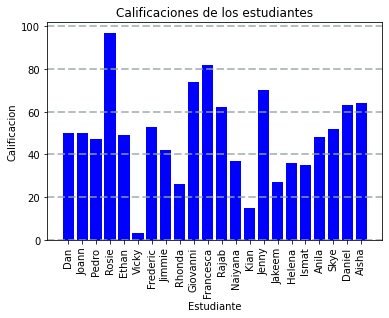

In [10]:
plt.bar(x=df_students.Nombre, height=df_students.Calificacion, color='blue')

# Personaliza
plt.title('Calificaciones de los estudiantes')
plt.xlabel('Estudiante')
plt.ylabel('Calificacion')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

Un gráfico está técnicamente contenido dentro de una **Figura**. En los ejemplos anteriores, la figura se creó implícitamente, pero puede crearla explícitamente. Por ejemplo, el siguiente código crea una figura con un tamaño específico.

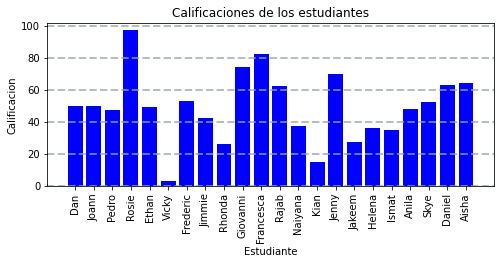

In [11]:
# Crea la Figura
fig = plt.figure(figsize=(8,3))

plt.bar(x=df_students.Nombre, height=df_students.Calificacion, color='blue')

# Customize the chart
plt.title('Calificaciones de los estudiantes')
plt.xlabel('Estudiante')
plt.ylabel('Calificacion')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)


plt.show()

Una figura puede contener múltiples subgráficas, cada una en su propio eje.

Por ejemplo, el siguiente código crea una figura con dos subgraficos: una es un gráfico de barras que muestra las calificaciones de los estudiantes, y la otra es un gráfico circular que compara el número de calificaciones de aprobado con el de no aprobado.

<ipython-input-12-d57f2268fba6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Nombre, rotation=90)
<ipython-input-12-d57f2268fba6>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


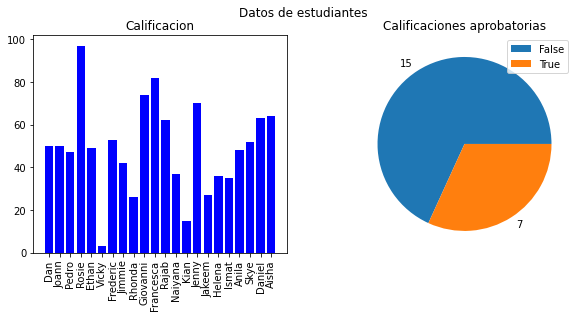

In [12]:
# Crear una figura para 2 subgraficos (1 fila, 2 columnas)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Crea un gráfico de barras de nombre vs grado en el primer eje
ax[0].bar(x=df_students.Nombre, height=df_students.Calificacion, color='blue')
ax[0].set_title('Calificacion')
ax[0].set_xticklabels(df_students.Nombre, rotation=90)

# Crear un gráfico circular de los aprobados en el segundo eje
pass_counts = df_students['Pasa'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Calificaciones aprobatorias')
ax[1].legend(pass_counts.keys().tolist())

# Agregar titulo
fig.suptitle('Datos de estudiantes')

fig.show()

Hasta ahora, hemos usado métodos del objeto `Matplotlib.pyplot` para trazar gráficos. Sin embargo, Matplotlib es tan fundamental para los gráficos en Python que muchos paquetes, incluyendo Pandas, proporcionan métodos que abstraen las funciones subyacentes de Matplotlib y simplifican el trazado. Por ejemplo, el DataFrame proporciona sus propios métodos para trazar datos como se muestra en el siguiente ejemplo, que traza un gráfico de barras de horas de estudio.

<AxesSubplot:xlabel='Nombre'>

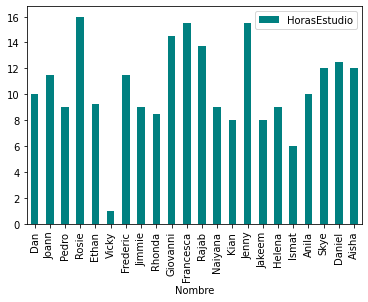

In [13]:
df_students.plot.bar(x='Nombre', y='HorasEstudio', color='teal', figsize=(6,4))

## Introducción al análisis estadístico

Ahora que ya sabes cómo utilizar Python para manipular y visualizar datos, puedes empezar a analizarlos.

Gran parte de la ciencia de datos tiene sus raíces en la estadística, por lo que exploraremos algunas técnicas estadísticas básicas.


### Estadística descriptiva y distribución de datos

Cuando se examina una *variable* (por ejemplo, una muestra de calificaciones de estudiantes), los científicos de datos están especialmente interesados en su distribución (en otras palabras, cómo se distribuyen los diferentes valores de las calificaciones en la muestra). El punto de partida para esta exploración suele ser visualizar los datos como un histograma y ver con qué frecuencia se produce cada valor de la variable.

<ipython-input-14-ccf0005afa28>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


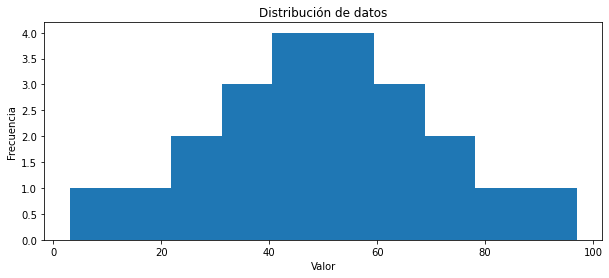

In [14]:
# Obtener la variable a examinar
var_data = df_students['Calificacion']

# Crear la figura
fig = plt.figure(figsize=(10,4))

# Trazar un histograma
plt.hist(var_data)

# Agregar titulos y etiquetas
plt.title('Distribución de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Show the figure
fig.show()

El histograma de calificaciones tiene una forma simétrica, en la que las calificaciones más frecuentes tienden a situarse en el centro del intervalo (en torno a 50), con menos calificaciones en los extremos de la escala.

#### Medidas de tendencia central

Para entender mejor la distribución, podemos examinar las llamadas *medidas de tendencia central+, que es una forma elegante de describir las estadísticas que representan el "medio" de los datos. El objetivo de este análisis es tratar de encontrar un valor "típico". Algunas formas habituales de definir el centro de los datos son:

- La *media*: Un promedio simple basado en la suma de todos los valores del conjunto de muestras y dividiendo el total por el número de muestras.
- La *mediana*: El valor en el centro del rango de todos los valores de la muestra.
- La *moda*: El valor más frecuente en el conjunto de muestras<sup>\*</sup>.

Calculemos estos valores, junto con los valores mínimo y máximo para compararlos, y mostrémoslos en el histograma.


> <sup>\*</sup>Por supuesto, en algunos conjuntos de muestras puede haber un empate para el valor más común. En esos casos, el conjunto de datos se describe como *bimodal* o incluso *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



<ipython-input-15-3f81dfdc0361>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


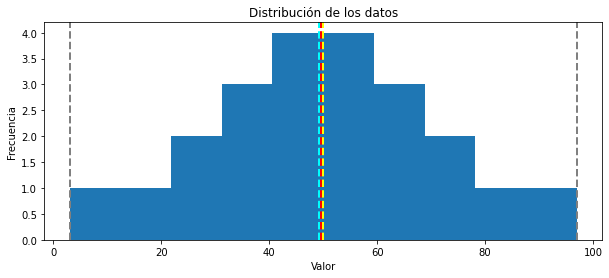

In [15]:
# Obtener variable a examinar
var = df_students['Calificacion']

# Obtener estadísticas
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val)
# Crear la figura
fig = plt.figure(figsize=(10,4))

# trazar el histograma
plt.hist(var)

# Añadir líneas para las estadísticas
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Agregar titulos y etiquetas
plt.title('Distribución de los datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


fig.show()

En el caso de las calificaciones, la media, la mediana y la moda parecen estar más o menos en el centro del mínimo y el máximo, en torno a los 50 puntos.

Otra forma de visualizar la distribución de una variable es utilizar un diagrama de caja (a veces llamado diagrama de caja y bigotes). Vamos a crear uno para los datos de calificaciones.

<ipython-input-16-a8223b779f6e>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


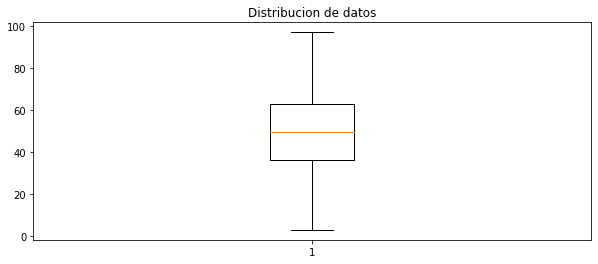

In [16]:
# Obtener variable a examinar
var = df_students['Calificacion']

# Crear la figura
fig = plt.figure(figsize=(10,4))

# trazar el histograma
plt.boxplot(var)

# Agregar titulos y etiquetas
plt.title('Distribucion de datos')


fig.show()

El diagrama de cajas muestra la distribución de los valores de las calificaciones en un formato diferente del histograma. La parte de la *caja* del gráfico muestra dónde se encuentran los dos *cuartiles* interiores de los datos. En este caso, la mitad de las calificaciones se sitúan entre 36 y 63 aproximadamente. Los *bigotes* que se extienden desde la caja muestran los dos cuartiles exteriores, por lo que la otra mitad de las calificaciones en este caso están entre 0 y 36 o 63 y 100. La línea en la caja indica la mediana de los datos. La línea del recuadro indica el valor *mediano*.

Para el aprendizaje, puede ser útil combinar histogramas y gráficos de caja, cambiando la orientación del gráfico de caja para alinearlo con el histograma.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



<ipython-input-17-2bfe8e99f568>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


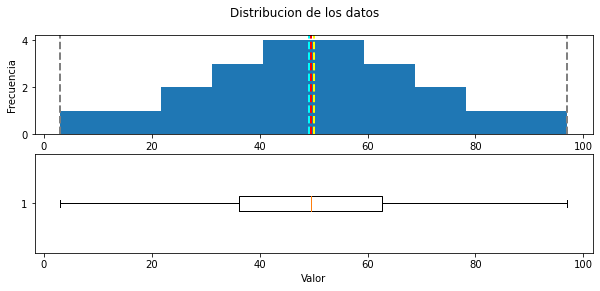

In [17]:
# Creamos una funcion que podremos reutilizar
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Creamos una figura de 2 subgraficas (2 filas, 1 columna)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Trazar el histograma  
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frecuencia')

    # Añadir líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Valor')

    # Agregar titulo a la figura
    fig.suptitle('Distribucion de los datos')

    # Show the figure
    fig.show()

#  Obtener la variable a examinar
col = df_students['Calificacion']
# llamar la función
show_distribution(col)

Todas las medidas de tendencia central se encuentran justo en el centro de la distribución de datos, que es simétrica, con valores cada vez más bajos en ambas direcciones a partir del centro.

Para explorar esta distribución con más detalle, es necesario comprender que la estadística consiste fundamentalmente en tomar muestras de datos y utilizar funciones de probabilidad para extrapolar información sobre toda la población de datos.

¿Qué significa esto? Las *muestras* se refieren a los datos que tenemos a mano, como la información sobre los hábitos de estudio y las calificaciones de estos 22 estudiantes. La *población* se refiere a todos los datos posibles que podríamos recopilar, como las notas y los hábitos de estudio de todos los estudiantes en todas las instituciones educativas a lo largo de la historia. Normalmente nos interesa la población, pero no resulta práctico recopilar todos esos datos. En su lugar, tenemos que intentar estimar cómo es la población a partir de la pequeña cantidad de datos (muestras) de que disponemos.

Si tenemos suficientes muestras, podemos calcular algo llamado función de densidad de probabilidad, que estima la distribución de las calificaciones para toda la población.

La clase **pyplot** de Matplotlib proporciona una útil función gráfica para mostrar esta densidad.

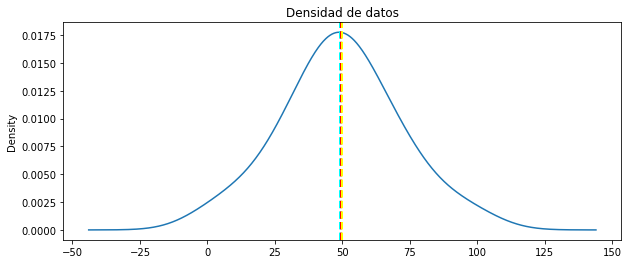

In [18]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    var_data.plot.density()

    plt.title('Densidad de datos')

    # Muestra la media, la mediana y la moda
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

# Obtiene la densidad de la calificación
col = df_students['Calificacion']
show_density(col)

La densidad muestra la característica "curva de campana" de lo que los estadísticos llaman una distribución normal con la media y la moda en el centro y colas simétricas.